<h1>Trabajo Muestreo-Interferencia</h1>
<!----Hey hey!!!---->

<h2>Asignatura: Estadistica 2</h2>

<h3>Profesor: Carlos Alfonso Mantilla Duarte
<br>
Grupo: F1</h3>

<h4> Andrés Felipe Uribe García - 2160793
<br>Julian - 212121
<br>Isabel - 212121</h4>

En los siguientes enlaces encontrará los datos relacionados con los resultados de las pruebas de estado para las Instituciones de Educación Superior (IES) colombianas de carácter universitario de los últimos tres (3) años:

 https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData

Considere estos datos como una población finita. Las variables que componen la tabla son:



 - `periodo:` año de realización de la prueba. La variable se presenta fragmentada debido al origen de los datos. Requiere agruparse adecuadamente. Para ello, consulte la función revalue y describa, brevemente, su funcionamiento.
 -  `apli_consecutivo:` consecutivo asignado al estudiante en el momento de presentar la prueba. Único por estudiante
 -  `estu_depto_reside:` departamento de residencia del estudiante
 -   `estu_cod_reside_depto:` código DANE del departamento de residencia del estudiante
 -   `inst_cod_institucion:` código de la IES ante el ministerio. Único por Institución
 -   `inst_nombre_institucion:` Nombre de la Institución. Algunas presentan sedes y subsedes
 -   `raz_cuant_punt:` Puntaje Razonamiento Cuantitativo
 -   `raz_cuant_des:` Nivel de Desempeño Razonamiento Cuantitativo (categórica)
 -   `lect_crit_punt:` Puntaje Lectura Crítica
 -   `lect_crit_des:` Nivel de Desempeño Lectura Crítica (categórica)
 -   `comp_ciud_punt:` Puntaje Competencias Ciudadanas
 -   `comp_ciud_des:` Nivel de Desempeño Competencias Ciudadanas (categórica)
 -   `ingles_punt:` Puntaje Inglés
 -   `ingles_desem:` Nivel de Desempeño en Inglés (categórica)
 -  `comu_escr_punt:` Puntaje Comunicación Escrita
 -  `comu_escr_des:` Nivel de Desempeño Comunicación Escrita (categórica)

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

Los puntos a desarrollar son:


   1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
   2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
   3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
   4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
    Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
   5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

El trabajo puede entregarse en formato PDF o como notebook de jupyter

Recomendaciones:

 -   Procure tabular de manera adecuada las estimaciones para optimizar espacio
 -   Evite extenderse en las explicaciones
 -   Trate de optimizar el uso de gráficas (visite el siguiente repositorio si desea una guía: https://github.com/karlosmantilla/graficas-basicas-descriptivas-
 -   Referencie las fórmulas empleadas en los cálculos


In [1]:
library(samplingbook) # llamamos la librería
load('saberpro.RData')
ls() 
dim(sp161718)

Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survival'


The following objects are masked from 'package:sampling':

    cluster, strata



Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart




[1] "sp161718"

[1] 725295     16

In [2]:
mystats <- function(x, na.omit=FALSE){
  if (na.omit)
  x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x-m)^3/s^3)/n
  kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt))
}

In [3]:
Datos<-get(load("saberpro.RData"))

In [4]:
head(Datos); tail(Datos) # Primeras y últimas observaciones de la tabla

,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
1,20163,EK201630062726,ATLANTICO,8,1202,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,160,3,130,2,167,3,160,A2,155,3
2,20163,EK201630208121,CUNDINAMARCA,25,2725,POLITECNICO GRANCOLOMBIANO-BOGOTÃ D.C.,138,2,132,2,77,1,125,A1,164,3
3,20163,EK201630220210,CALDAS,17,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÃ D.C.,146,2,157,2,150,2,104,A1-,122,2
4,20163,EK201630180243,MAGDALENA,47,10413,IED ESCUELA NORMAL SUPERIOR MARÃA AUXILIADORA - SEDE PRINCIPAL-SANTA MARTA,160,3,172,3,151,2,160,A2,192,4
5,20163,EK201630225077,CORDOBA,23,1113,UNIVERSIDAD DE CORDOBA-MONTERIA,130,2,122,1,144,2,192,B1,131,2
6,20163,EK201630189735,CAUCA,19,1807,UNIVERSIDAD LIBRE-CALI,159,3,129,2,147,2,108,A1-,154,3


,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
725290,20183,EK201830220242,VALLE,76,2114,ESCUELA NACIONAL DEL DEPORTE-CALI,125,1,111,1,100,1,134,A1,140,2
725291,20183,EK201830103468,SANTANDER,68,2847,"CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -""UDI""-BUCARAMANGA",182,3,145,2,152,2,167,A2,154,3
725292,20183,EK201830186897,BOGOTA,11,9104,"ESCUELA MILITAR DE CADETES ""GENERAL JOSE MARIA CORDOVA""-BOGOTÃƒÂ D.C.",149,2,129,2,110,1,168,A2,122,2
725293,20183,EK201830155382,SANTANDER,68,2207,INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA,185,3,173,3,190,3,148,A2,178,3
725294,20183,EK201830225312,,NA,1201,UNIVERSIDAD DE ANTIOQUIA-MEDELLIN,179,3,165,3,192,3,156,A2,150,3
725295,20183,EK201830039482,SUCRE,70,2823,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO,135,2,122,1,99,1,132,A1,138,2


<h2>Definición de los datos</h2>

In [5]:
PT<-data.frame(C=Datos$estu_cod_reside_depto,
               T=(Datos$raz_cuant_punt +
                Datos$lect_crit_punt +
                Datos$comp_ciud_punt +
                Datos$ingles_punt +
                Datos$comu_escr_punt)/5, # Global
                RC=Datos$raz_cuant_punt,
                LC=Datos$lect_crit_punt,
                CC=Datos$comp_ciud_punt,
                I=Datos$ingles_punt,
                CE=Datos$comu_escr_punt,
                D=Datos$estu_depto_reside)

In [6]:
pop<-round(mystats(PT[,'I']),1)
data.frame(pop)

,pop
,<dbl>
tamaño,725295.0
media,150.4
desviación estándar,31.9
simetría,0.3
kurtosis,1.5


<h3>Tamaño adecuado de la muestra</h3>

In [7]:
#c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt)
#error del 5%
e=0.05*pop['media'] #Error * Media
s=pop['desviación estándar'] #Desviación Estandar
sample.size.mean(e,s, level = 0.95)
e=0.01*pop['media'] #Error * Media
sample.size.mean(e,s, level = 0.99)


sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=7.52 and standard deviation S=31.9

Sample size needed: 70



sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=1.504 and standard deviation S=31.9

Sample size needed: 2985


In [8]:
n1<-70
Rf1<- sample(1:nrow(PT),size=n1,replace=FALSE)
n2<-2985
Rf2<- sample(1:nrow(PT),size=n2,replace=FALSE)

<h1>1- Muestreo Simple</h1>
<H4>Total vs Razonamiento cuantitativo - Inglés - Lectura Crítica</H4>

<h3>Primer Muestreo N = 134</h3>
Nivel de confianza del $95\%$
Error del $5\%$

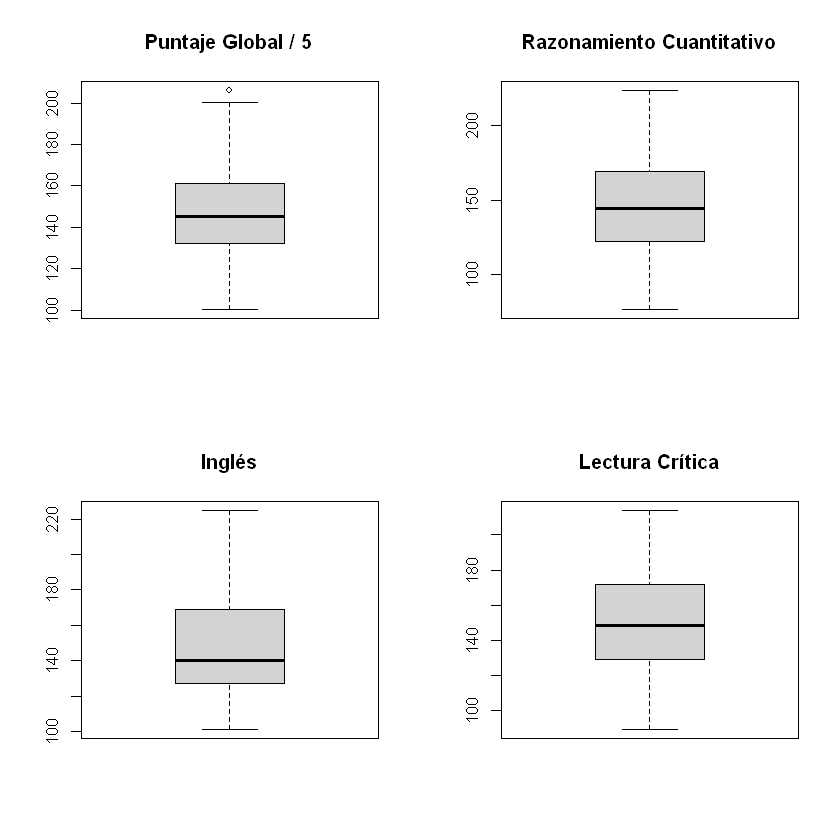

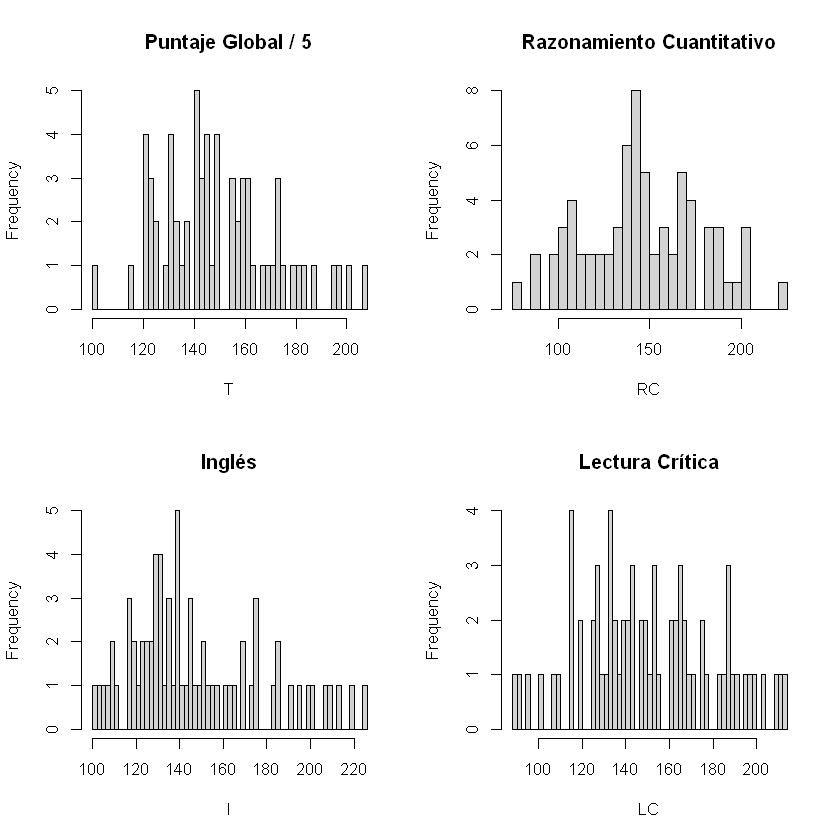

In [9]:
par(mfrow=c(2,2))

with(PT[Rf1,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf1,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], boxplot(I, main = 'Inglés'))
with(PT[Rf1,], boxplot(LC, main = 'Lectura Crítica'))

with(PT[Rf1,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf1,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf1,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Segundo Muestreo N = 2985</h3>
Nivel de confianza del $99\%$
Error del $1\%$

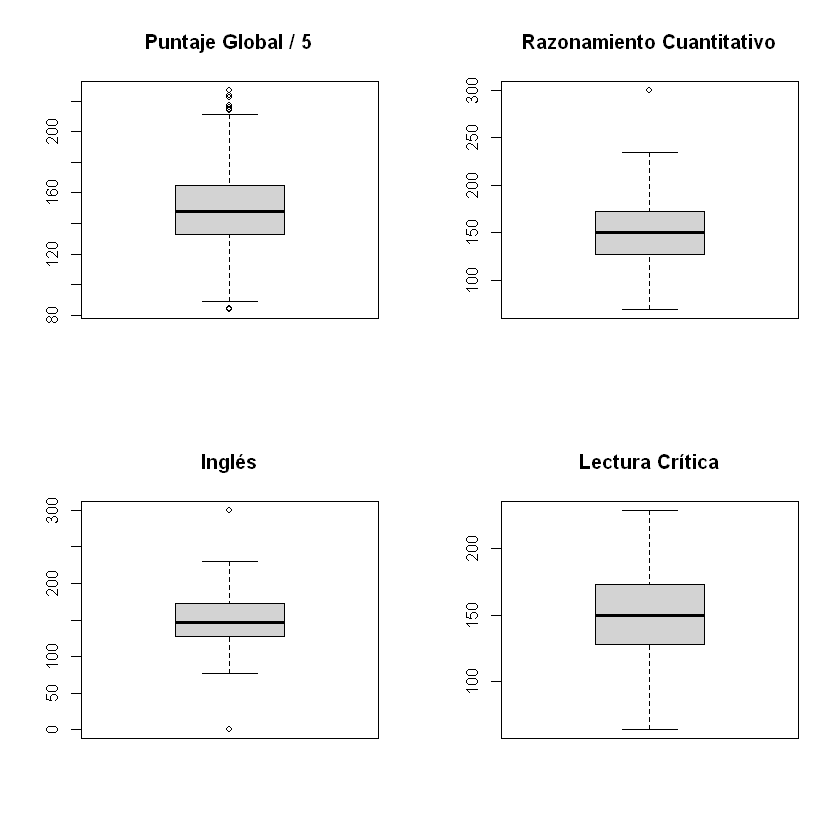

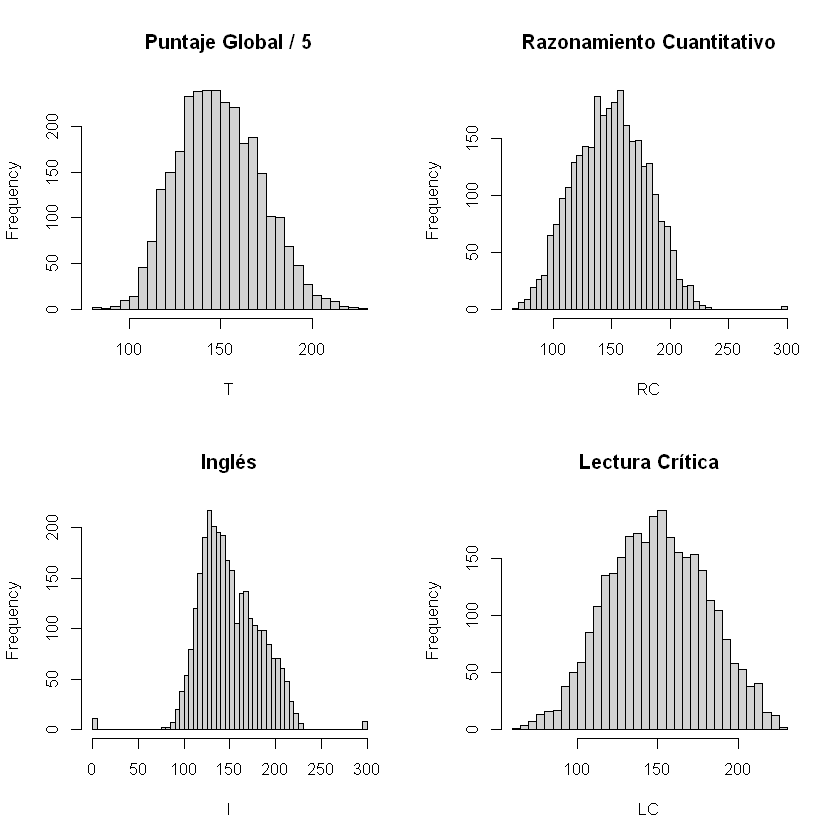

In [10]:
par(mfrow=c(2,2))
with(PT[Rf2,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf2,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], boxplot(I, main = 'Inglés'))
with(PT[Rf2,], boxplot(LC, main = 'Lectura Crítica'))
with(PT[Rf2,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf2,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf2,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Población Total</h3>

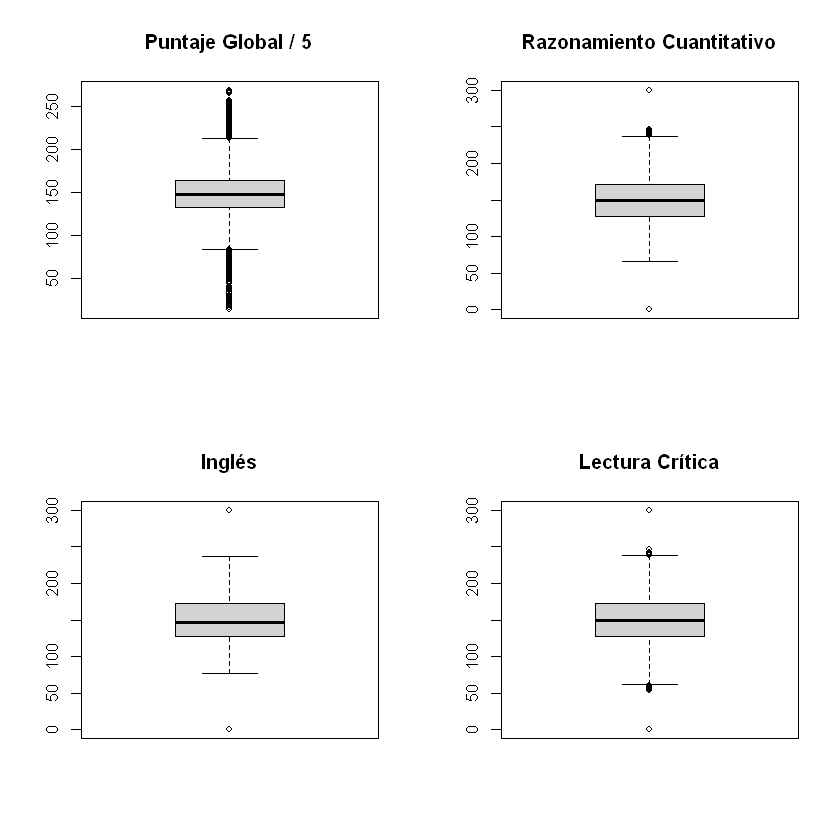

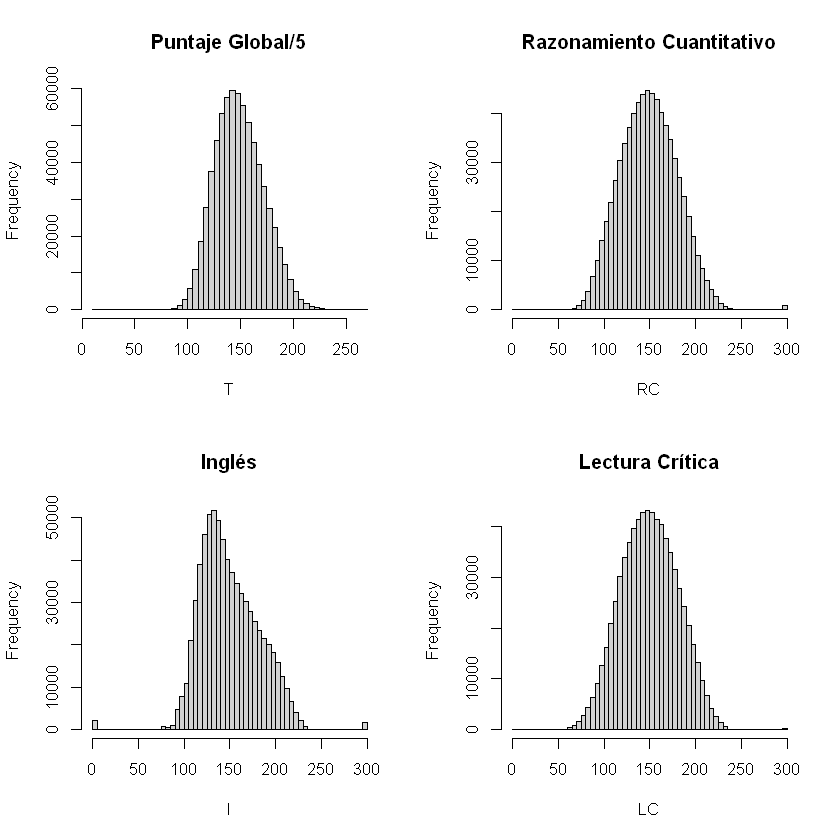

In [11]:
par(mfrow=c(2,2))
with(PT, boxplot(T, main = 'Puntaje Global / 5'))
with(PT, boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT, boxplot(I, main = 'Inglés'))
with(PT, boxplot(LC, main = 'Lectura Crítica'))
with(PT, hist(T, nclass = 50, main = 'Puntaje Global/5'))
with(PT, hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT, hist(I, nclass = 50, main = 'Inglés'))
with(PT, hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

### Inferencia

Para este caso comparamos 3 variables; Razonamiento cuantitativo, inglés, Lectura Crítica con respecto a una 4 creada para entrar en contexto la cual es "Puntaje Global"/"Total" el cual definimos como la suma de todas las variables divididas por 5

Las gráficas las creamos tomando 2 tamaños de muestra distintos el primero N = 134 con Nivel de confianza del $95\%$ y Error del $5\%$, el segundo como N = 2985 con Nivel de confianza del $99\%$ y Error del $1\%$ ambos con respecto a la población total

Podemos apreciar un comportamiento para el cual el primer muestreo, si bien dio resultados decentes, no nos permitía apreciar un nivel de detalle adecuado, mientras que el 2 no dista de los resultados obtenidos de la población total a un menor costo computacional

De los resultados obtenidos podemos apreciar que la asignatura inglesa representa un mayor reto para la mayoría de los estudiantes teniendo un pico mucho pronunciado hacia los 120 pts. decayendo con una pendiente mayor hacia los puntajes más altos a diferencia de Razonamiento Cuantitativo y Lectura crítica que pueden ser fácilmente modeladas por una distribución normal
